In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from S00_utils import plot_res, store_results

In [2]:
df = pd.read_excel("output/S21__2025-04-21-052727.xlsx")
df = df.set_index("Unnamed: 0")
df.index.names = ["id"]
df.head()

,m1,m2,m3,s1__autocorrelation__lag_8,s1__autocorrelation__lag_9,s1__autocorrelation__lag_7,s1__autocorrelation__lag_6,s1__autocorrelation__lag_5,s1__autocorrelation__lag_4,s1__longest_strike_above_mean,...,s1__ar_coefficient__coeff_3__k_10,s1__approximate_entropy__m_2__r_0.1,s1__lempel_ziv_complexity__bins_3,s1__partial_autocorrelation__lag_4,"s1__fft_coefficient__attr_""abs""__coeff_7","s1__agg_autocorrelation__f_agg_""var""__maxlag_40",s1__spkt_welch_density__coeff_2,y1,y2,y3
id,,,,,,,,,,,,,,,,,,,,,
E001,150.223716,1176.177278,1.142097,-0.305434,-0.519191,-0.074829,0.159896,0.385790,0.590387,14,...,0.183996,0.158567,0.204152,-0.360084,0.293617,0.499488,5.886812e-08,55.460434,1.065917,114.578620
E002,102.534268,1483.654982,1.104716,-0.243785,-0.454262,-0.021002,0.202836,0.416423,0.608972,14,...,0.184370,0.144742,0.203008,-0.344364,6.142373,0.477743,3.643621e-06,50.640306,1.285666,124.651484
E003,119.890549,1254.897451,2.162773,-0.329006,-0.543405,-0.095913,0.142612,0.373002,0.582151,14,...,0.184036,0.144268,0.208163,-0.364611,26.783283,0.506435,1.590028e-04,50.832405,1.154859,57.018054
E004,162.830799,1302.043195,1.308283,-0.065152,-0.266498,0.138913,0.337187,0.521401,0.683873,16,...,0.187213,0.137326,0.193662,-0.355441,33.227591,0.460547,7.926165e-04,62.476545,1.025161,132.221218
E005,165.720956,1154.482314,1.566830,-0.304881,-0.518177,-0.074836,0.159321,0.384728,0.589003,14,...,0.183978,0.128546,0.192440,-0.357588,11.439470,0.497940,1.462831e-04,57.634438,1.043776,92.160269


In [3]:
colsY = ["y1", "y2", "y3"]
colsX = [c for c in df.columns if c not in colsY]

X = df[colsX]
Y = df[colsY]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(Y_train.shape)

(70, 3)


In [4]:
scX = StandardScaler()
X_train_std = scX.fit_transform(X_train)
X_test_std = scX.transform(X_test)

scY = StandardScaler()
Y_train_std = scY.fit_transform(Y_train)
Y_test_std = scY.transform(Y_test)

In [5]:
paramSet = {
    "ex1": {"n_estimators": 10, "learning_rate": 1.0, "max_depth": 2},
    "ex2": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 3},
    "ex3": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 10},
    "ex4": {"n_estimators": 50, "learning_rate": 1.0, "max_depth": 1},
    "ex5": {"n_estimators": 100, "learning_rate": 1.0, "max_depth": 1},
    "ex6": {"n_estimators": 200, "learning_rate": 1.0, "max_depth": 1},
}

params = paramSet["ex4"]

In [6]:
base = GradientBoostingRegressor(**params)
regressor = MultiOutputRegressor(base)

In [7]:
regressor.fit(X_train_std, Y_train_std)
Y_train_pred = regressor.predict(X_train_std)
Y_test_pred = regressor.predict(X_test_std)

,MSE Train,MSE Test,R2 Train,R2 Test
0,0.001795,0.433649,0.998205,0.637391
1,0.001325,0.256468,0.998675,0.681411
2,0.002288,0.222276,0.997712,0.750647


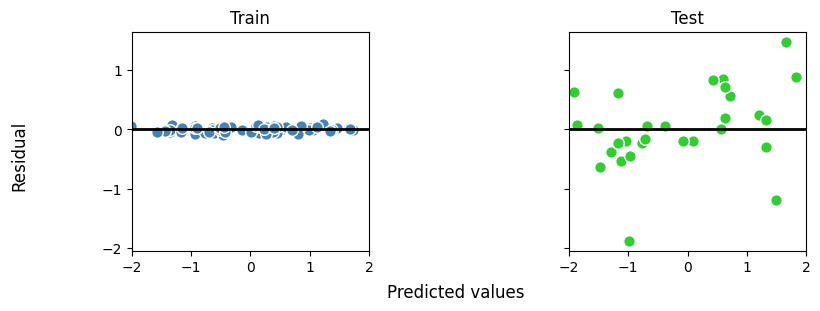

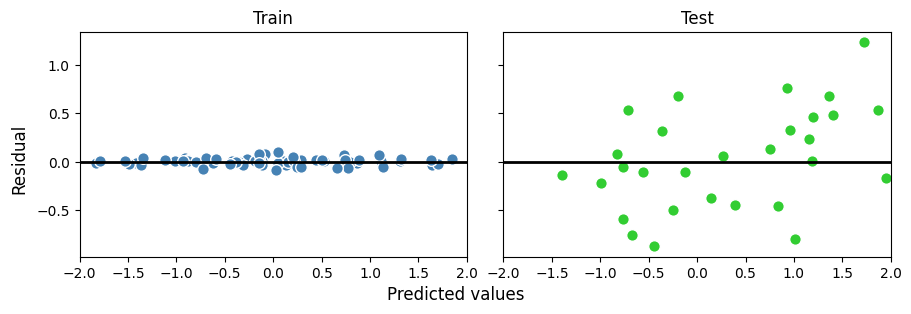

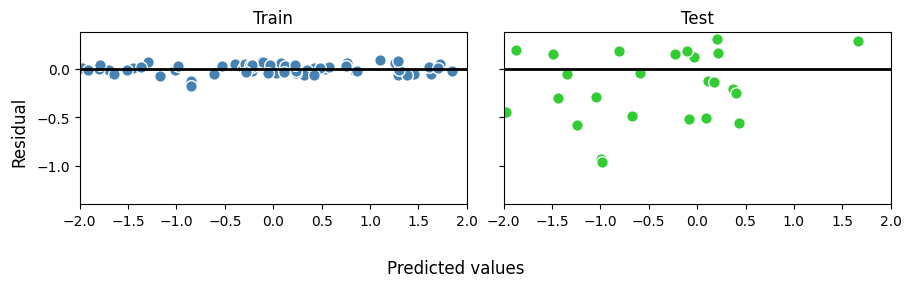

In [8]:
resArr = []
for i in range(Y.shape[1]):
    y_train = Y_train_std[:, i]
    y_test = Y_test_std[:, i]
    y_train_pred = Y_train_pred[:, i]
    y_test_pred = Y_test_pred[:, i]
    plot_res(y_train, y_test, y_train_pred, y_test_pred)
    res = store_results(y_train, y_test, y_train_pred, y_test_pred)
    resArr.append(res)

dfRes = pd.DataFrame.from_dict(resArr)
dfRes


In [9]:
dfFi = pd.DataFrame(data={"feature": X.columns.values})
estimators = regressor.estimators_
for i in range(len(estimators)):
    fi = estimators[i].feature_importances_
    dfFi[f"importance_{i+1}"] = fi

dfFi

,feature,importance_1,importance_2,importance_3
0,m1,0.200244,0.006806,0.007180
1,m2,0.009018,0.232172,0.003742
2,m3,0.013122,0.011093,0.396163
3,s1__autocorrelation__lag_8,0.000000,0.000000,0.000000
4,s1__autocorrelation__lag_9,0.000000,0.000000,0.000000
5,s1__autocorrelation__lag_7,0.000000,0.000000,0.000000
6,s1__autocorrelation__lag_6,0.000000,0.000000,0.000000
7,s1__autocorrelation__lag_5,0.000000,0.000000,0.000000
8,s1__autocorrelation__lag_4,0.000391,0.000000,0.000000
9,s1__longest_strike_above_mean,0.000000,0.000000,0.000000
